In [3]:
import yfinance as yf
import pandas as pd
import requests as r
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

warnings.filterwarnings("ignore")

   
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head(10)



,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
5,2010-07-07 00:00:00-04:00,1.093333,1.108667,0.998667,1.053333,103825500,0.0,0.0
6,2010-07-08 00:00:00-04:00,1.076000,1.168000,1.038000,1.164000,115671000,0.0,0.0
7,2010-07-09 00:00:00-04:00,1.172000,1.193333,1.103333,1.160000,60759000,0.0,0.0
8,2010-07-12 00:00:00-04:00,1.196667,1.204667,1.133333,1.136667,33037500,0.0,0.0
9,2010-07-13 00:00:00-04:00,1.159333,1.242667,1.126667,1.209333,40201500,0.0,0.0


In [4]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"  # Replace with the actual URL

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}


response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')


try:

    tesla_revenue = pd.read_html(str(soup), match="Tesla Quarterly Revenue", flavor='bs4')[0]
    
   
    print("Columns in DataFrame:", tesla_revenue.columns.tolist())
    
    tesla_revenue = tesla_revenue.rename(columns={
        tesla_revenue.columns[0]: 'Date',
        tesla_revenue.columns[1]: 'Revenue'
    })
    
    if 'Revenue' in tesla_revenue.columns:
        tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(str).str.replace(",","").str.replace("$","")
    
except Exception as e:
    print(f"Error with first method: {e}")
    
    try:
        tesla_revenue = pd.read_html(url, match="Tesla Quarterly Revenue", flavor='bs4')[0]
        

        print("Columns in DataFrame (second attempt):", tesla_revenue.columns.tolist())
        

        tesla_revenue = tesla_revenue.rename(columns={
            tesla_revenue.columns[0]: 'Date',
            tesla_revenue.columns[1]: 'Revenue'
        })
        
       
        if 'Revenue' in tesla_revenue.columns:
            tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(str).str.replace(",","").str.replace("$","")
    
    except Exception as e:
        print(f"Error with second method: {e}")

print(tesla_revenue.head())
tesla_revenue

Columns in DataFrame: ['Tesla Quarterly Revenue (Millions of US $)', 'Tesla Quarterly Revenue (Millions of US $).1']
         Date Revenue
0  2025-06-30   22496
1  2025-03-31   19335
2  2024-12-31   25707
3  2024-09-30   25182
4  2024-06-30   25500


,Date,Revenue
0,2025-06-30,22496
1,2025-03-31,19335
2,2024-12-31,25707
3,2024-09-30,25182
4,2024-06-30,25500
...,...,...
60,2010-06-30,28
61,2010-03-31,21
62,2009-12-31,nan
63,2009-09-30,46


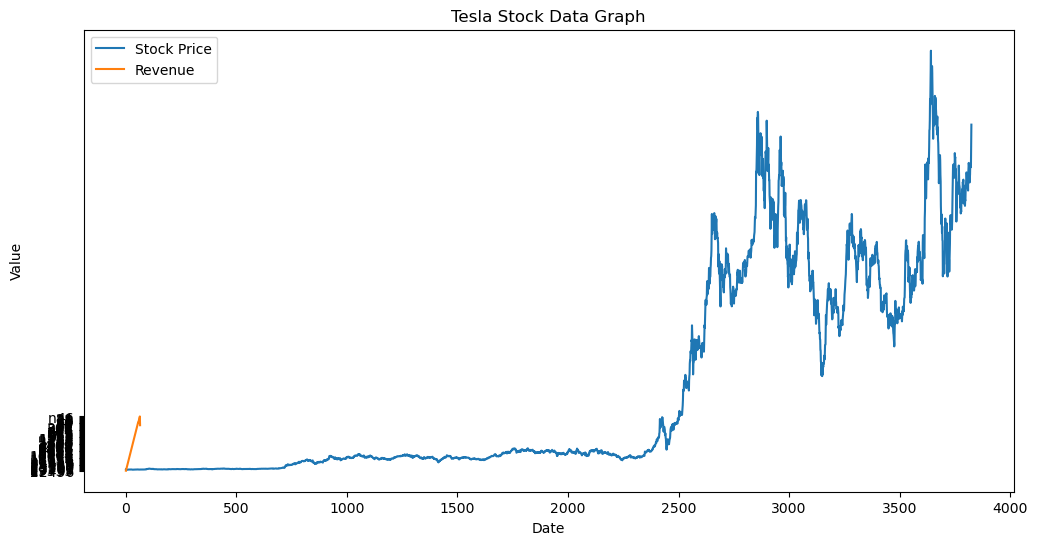

In [5]:
import matplotlib.pyplot as plt
def make_graph(data, revenue, title):
    
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label='Stock Price')
    plt.plot(revenue.index, revenue['Revenue'], label='Revenue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

make_graph(tesla_data, tesla_revenue, 'Tesla Stock Data Graph')